In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Load the Fashion_Mnist dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# 28 x 28 images
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

### Create validation set from training set

In [5]:
X_valid = X_train_full[:5000]
X_train = X_train_full[5000:]

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_test = X_test 

### Do some exploration of images in the dataset

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

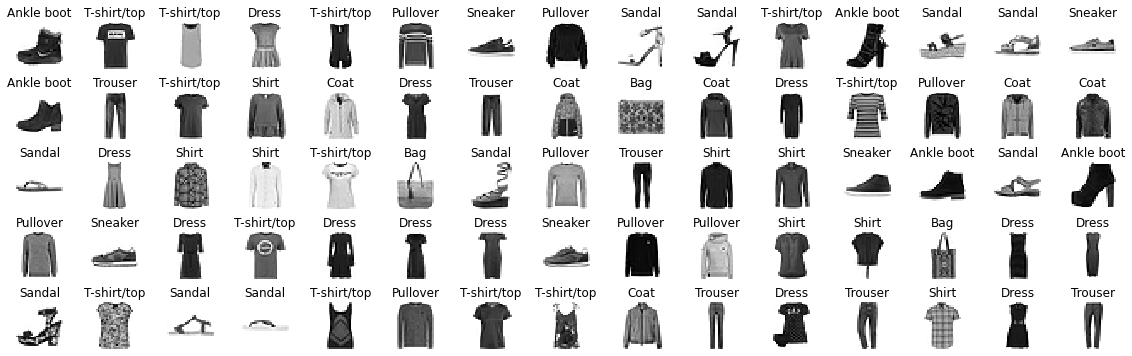

In [7]:
# Plot first 75 images
n_rows = 5
n_cols = 15
plt.figure(figsize=(20,6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

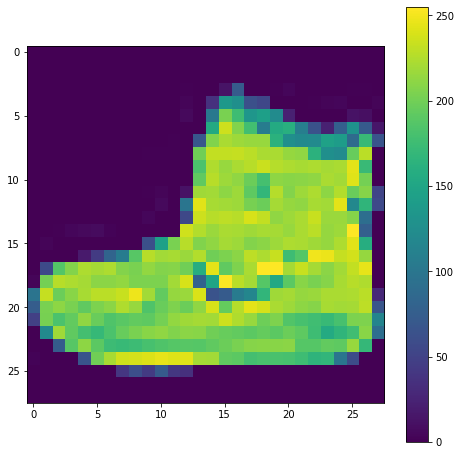

In [8]:
# Check example pixel values
plt.figure(figsize=(8,8))
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
class_names[y_train_full[0]]

'Ankle boot'

### Create Model to train

In [10]:
# Create Sequential MLP
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # softmax because classes are exclusive
])
# I tried adding dropout layers, accuracy decreased

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


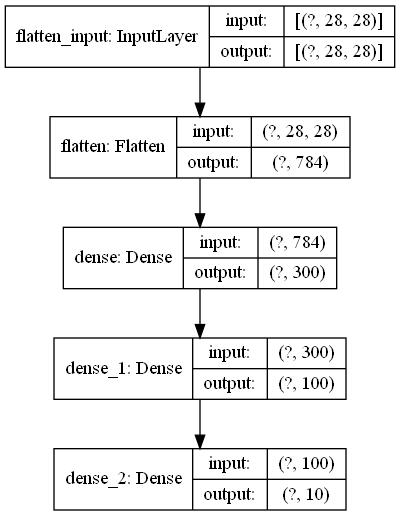

In [32]:
keras.utils.plot_model(model, "../dot_models/my_fashion_mnist_model.png", show_shapes=True)

### Explore the 1st dense layer

In [13]:
model.layers

In [14]:
hidden2 = model.layers[2]
hidden2.name

'dense_1'

In [15]:
weights, biases = hidden2.get_weights()
weights

array([[-0.11517505,  0.1068942 ,  0.10298137, ..., -0.00564215,
        -0.11956042, -0.03912067],
       [-0.09317612,  0.0175172 , -0.11908262, ..., -0.01910472,
        -0.01619901, -0.08952858],
       [-0.06398962,  0.05242098,  0.05543502, ..., -0.07482389,
        -0.02541219,  0.01013271],
       ...,
       [ 0.10570832,  0.07970146,  0.10529193, ..., -0.09149822,
        -0.07577439, -0.06190855],
       [-0.07168061, -0.05127335, -0.02361285, ...,  0.11169257,
        -0.01870561, -0.05163847],
       [-0.09723778,  0.06863537, -0.03436431, ...,  0.04406347,
        -0.06354785, -0.06716144]], dtype=float32)

In [16]:
weights.shape

(300, 100)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [18]:
biases.shape

(100,)

### Compile the model

In [19]:
model.compile(loss='sparse_categorical_crossentropy',   # SCC because sparse labels (Each class is exclusive)
             optimizer='adam',
             metrics=['accuracy'])

### Fit the model

In [20]:
# Create a checkpoint in case of unexpected interruption
checkpoint_1 = ModelCheckpoint("../saved_models/keras_model1.h5")

fitted_model = model.fit(X_train, y_train, epochs=50,
                        validation_data = (X_valid, y_valid),
                        callbacks=[EarlyStopping(patience=15, restore_best_weights=True), checkpoint_1])

Epoch 1/50
1719/1719 [==============================] - 1s 860us/step - loss: 1.9532 - accuracy: 0.6998 - val_loss: 0.6219 - val_accuracy: 0.7794
Epoch 2/50
1719/1719 [==============================] - 1s 811us/step - loss: 0.6024 - accuracy: 0.7802 - val_loss: 0.5849 - val_accuracy: 0.7964
Epoch 3/50
1719/1719 [==============================] - 1s 789us/step - loss: 0.5249 - accuracy: 0.8089 - val_loss: 0.4747 - val_accuracy: 0.8240
Epoch 4/50
1719/1719 [==============================] - 1s 786us/step - loss: 0.4567 - accuracy: 0.8368 - val_loss: 0.4475 - val_accuracy: 0.8416
Epoch 5/50
1719/1719 [==============================] - 1s 789us/step - loss: 0.4338 - accuracy: 0.8464 - val_loss: 0.4012 - val_accuracy: 0.8602
Epoch 6/50
1719/1719 [==============================] - 1s 798us/step - loss: 0.4070 - accuracy: 0.8557 - val_loss: 0.4036 - val_accuracy: 0.8582
Epoch 7/50
1719/1719 [==============================] - 1s 798us/step - loss: 0.3956 - accuracy: 0.8617 - val_loss: 0.4399 -

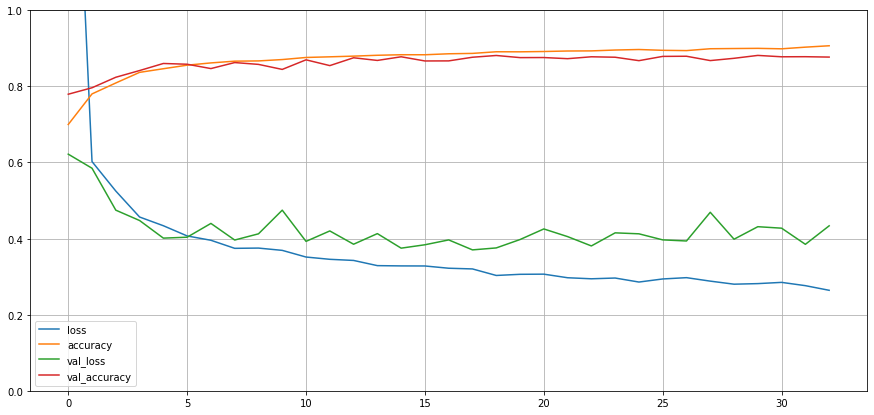

In [21]:
# Graph metrics over epochs
pd.DataFrame(fitted_model.history).plot(figsize=(15,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Try using SGD optimizer with scaled features and compare against adam/unscaled features

In [22]:
# Create Validation Set and scale data since using SGD as 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Create Sequential MLP
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # softmax because classes are exclusive
])
# I tried adding dropout layers, accuracy decreased

#Compile Model using SGD for optimizer
model2.compile(loss='sparse_categorical_crossentropy',   # SCC because sparse labels (Each class is exclusive)
             optimizer='sgd',
             metrics=['accuracy'])

# Create a checkpoint in case of unexpected interruption
checkpoint_2 = ModelCheckpoint("../saved_models/keras_model2.h5")

#Fit model
fitted_model2 = model2.fit(X_train, y_train, epochs=50,
                        validation_data = (X_valid, y_valid),
                        callbacks=[EarlyStopping(patience=15, restore_best_weights=True), checkpoint_2])

Epoch 1/50
1719/1719 [==============================] - 1s 733us/step - loss: 0.7129 - accuracy: 0.7625 - val_loss: 0.5004 - val_accuracy: 0.8316
Epoch 2/50
1719/1719 [==============================] - 1s 691us/step - loss: 0.4884 - accuracy: 0.8311 - val_loss: 0.4662 - val_accuracy: 0.8404
Epoch 3/50
1719/1719 [==============================] - 1s 688us/step - loss: 0.4451 - accuracy: 0.8445 - val_loss: 0.4244 - val_accuracy: 0.8572
Epoch 4/50
1719/1719 [==============================] - 1s 686us/step - loss: 0.4157 - accuracy: 0.8535 - val_loss: 0.3902 - val_accuracy: 0.8654
Epoch 5/50
1719/1719 [==============================] - 1s 684us/step - loss: 0.3952 - accuracy: 0.8614 - val_loss: 0.4138 - val_accuracy: 0.8576
Epoch 6/50
1719/1719 [==============================] - 1s 697us/step - loss: 0.3778 - accuracy: 0.8671 - val_loss: 0.3627 - val_accuracy: 0.8752
Epoch 7/50
1719/1719 [==============================] - 1s 689us/step - loss: 0.3635 - accuracy: 0.8712 - val_loss: 0.3558 -

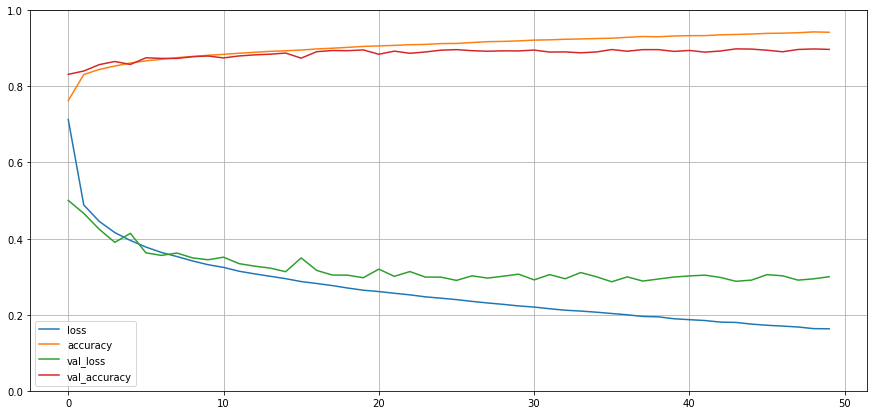

In [23]:
# Graph metrics over epochs
pd.DataFrame(fitted_model2.history).plot(figsize=(15,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
# Evaluate model on the test
model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 427us/step - loss: 0.3313 - accuracy: 0.8872


[0.3312889337539673, 0.8871999979019165]

In [25]:
fitted_model2.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

### Make predicitons using the scaled features with sgd model

In [26]:
X_new = X_test[:5]

In [27]:
y_proba = model2.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.88, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = model2.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1, 6], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [30]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

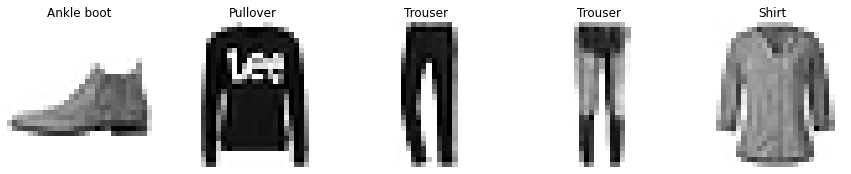

In [31]:
plt.figure(figsize=(15, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()